In [25]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.gofplots
import scipy.stats as scip
plt.style.use('seaborn')

In [26]:
symbol = 'BTC-USD'
ticker = yf.Ticker(symbol)
ticker.info

{'companyOfficers': [],
 'name': 'Bitcoin',
 'startDate': 1367107200,
 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,903,512. The last known price of Bitcoin is 47,090.57041302 USD and is down -1.95 over the last 24 hours. It is currently trading on 8198 active market(s) with $31,437,091,906.25 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 1,
 'exchange': 'CCC',
 'shortName': 'Bitcoin USD',
 'exchangeTimezoneName': 'UTC',
 'exchangeTimezoneShortName': 'UTC',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '0',
 'quoteType': 'CRYPTOCURRENCY',
 'symbol': 'BTC-USD',
 'messageBoardId': 'finmb_BTC_CCC',
 'market': 'ccc_market',
 'previousClose': 42914.273,
 'regularMarketOpen': 42914.273,
 'twoHundredDayAverage': 48355.875,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': 30932897792,
 'regularMarketDayHigh'

In [27]:
btc = ticker.history(period='1y',
                      interval='1d',
                     )
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-03-24 to 2022-03-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          366 non-null    float64
 1   High          366 non-null    float64
 2   Low           366 non-null    float64
 3   Close         366 non-null    float64
 4   Volume        366 non-null    int64  
 5   Dividends     366 non-null    int64  
 6   Stock Splits  366 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.9 KB


In [28]:
btc.Close

Date
2021-03-24    52774.265625
2021-03-25    51704.160156
2021-03-26    55137.312500
2021-03-27    55973.511719
2021-03-28    55950.746094
                  ...     
2022-03-20    41247.824219
2022-03-21    41077.996094
2022-03-22    42358.808594
2022-03-23    42892.957031
2022-03-24    43927.472656
Name: Close, Length: 366, dtype: float64

In [29]:
y_btc = np.diff(np.log(btc.Close))
y_btc

array([-2.04854329e-02,  6.42884193e-02,  1.50519090e-02, -4.06804133e-04,
        3.16550294e-02,  2.00146099e-02,  1.93594476e-05,  2.99923288e-03,
        4.87009084e-03, -3.04399812e-02,  1.98466431e-02,  5.08120733e-03,
       -1.47638975e-02, -3.75288709e-02,  3.97876757e-02, -1.35454984e-03,
        2.62341981e-02,  6.86230439e-03, -5.18761900e-03,  5.85271435e-02,
       -6.21993815e-03,  3.23225112e-03, -2.78866219e-02, -1.45429261e-02,
       -7.64724311e-02, -8.78897912e-03,  1.33475006e-02, -4.65197455e-02,
       -4.05818837e-02, -1.30013027e-02, -2.06204372e-02, -2.11327233e-02,
        9.74797068e-02,  1.85483191e-02, -3.79425537e-03, -2.34296738e-02,
        7.54151877e-02,  1.34757236e-03, -2.09160476e-02,  1.00011022e-02,
       -6.99936362e-02,  7.38970865e-02, -1.80550936e-02,  1.68770968e-02,
        2.49216197e-02, -9.76562803e-03, -4.15955412e-02,  1.50099573e-02,
       -1.42967147e-01,  1.14429281e-02,  3.30018676e-03, -6.45987032e-02,
       -6.52525709e-03, -

In [30]:
y_btc_df = pd.DataFrame(y_btc)
y_btc_df.describe()

,0
count,365.000000
mean,-0.000503
std,0.038750
min,-0.148107
25%,-0.021315
50%,0.000189
75%,0.021160
max,0.135764


In [31]:
skewness = scip.skew(y_btc)
kurtosis = scip.kurtosis(y_btc)
print(f"Skewness: {skewness}\nKurtosis: {kurtosis}")

Skewness: -0.17586976735929655
Kurtosis: 1.6738335806931


Text(0, 0.5, 'Returns')

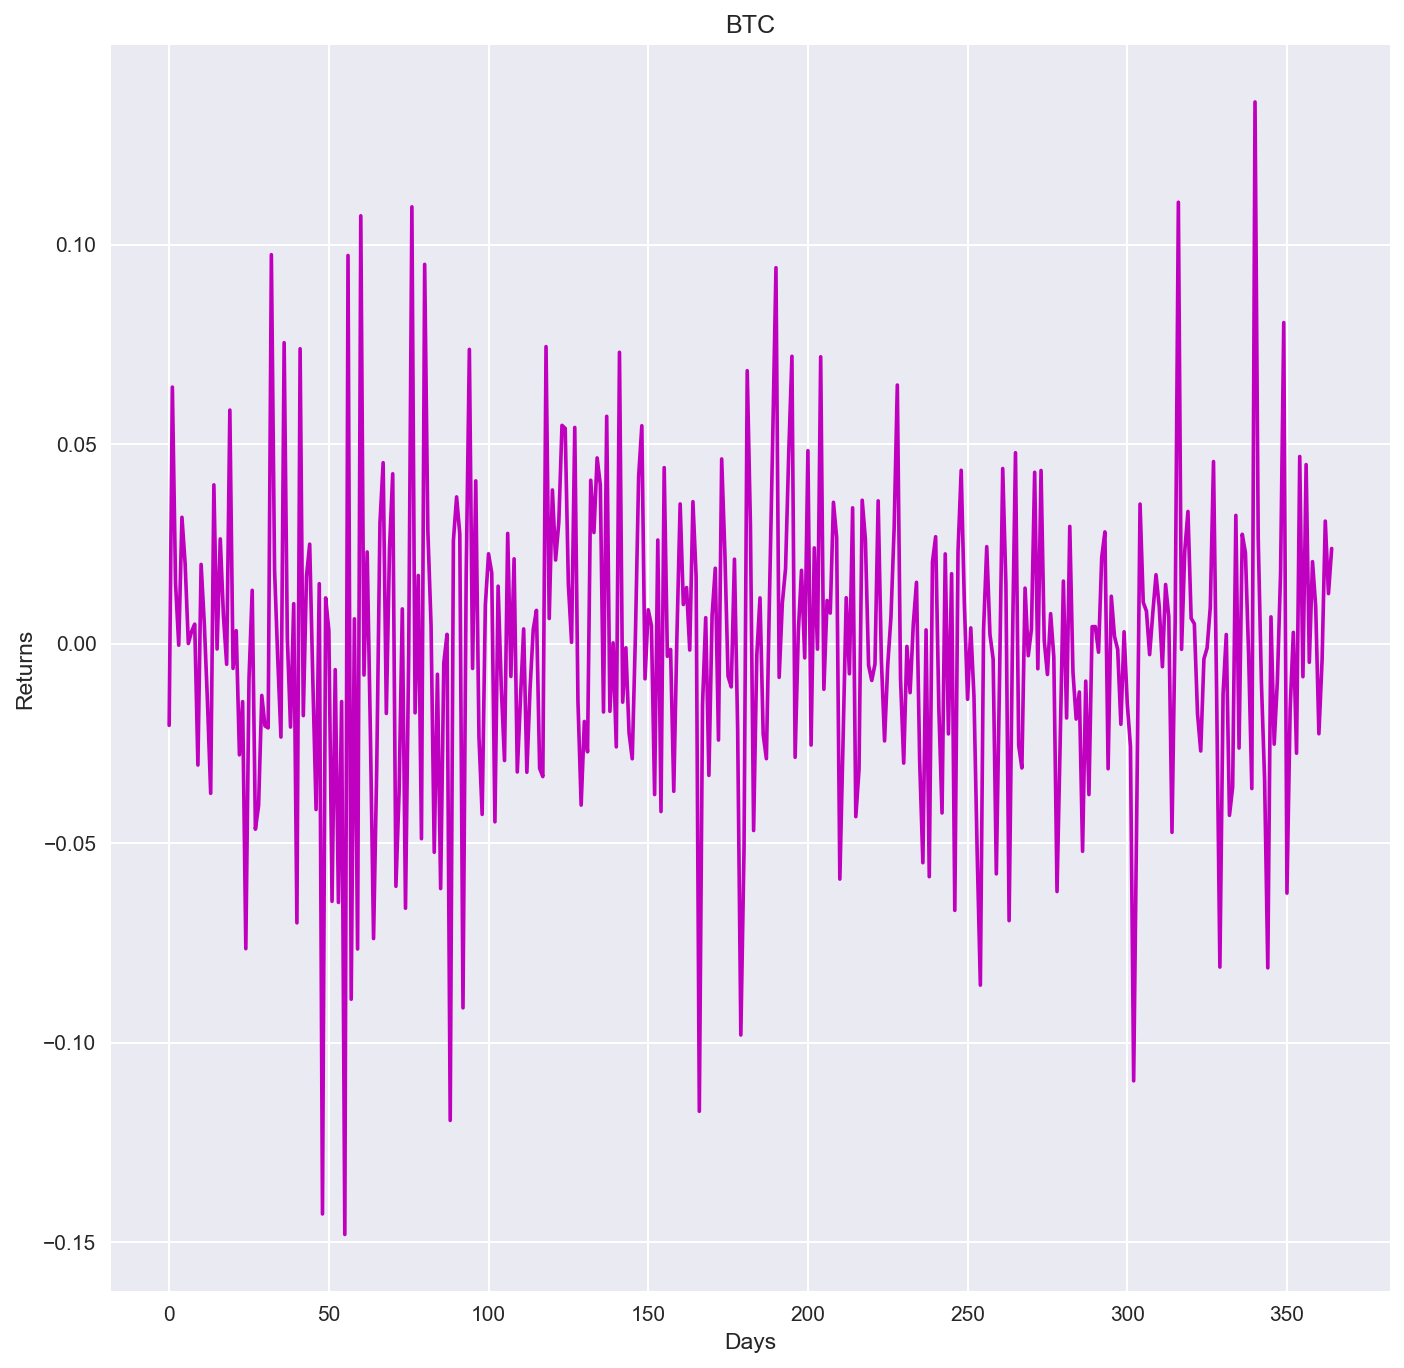

In [32]:
plt.figure(figsize=(11,11), dpi=150)
plt.plot(y_btc, color='m')
plt.title('BTC')
plt.xlabel('Days')
plt.ylabel('Returns')

((array([-2.89476187, -2.60416026, -2.44008156, -2.32339534, -2.23174377,
         -2.15571559, -2.09042256, -2.032987  , -1.98156619, -1.93490632,
         -1.89211417, -1.85253003, -1.81565229, -1.78109027, -1.74853354,
         -1.71773117, -1.68847732, -1.66060095, -1.63395835, -1.60842754,
         -1.58390407, -1.56029777, -1.53753027, -1.51553298, -1.4942455 ,
         -1.4736144 , -1.45359213, -1.4341362 , -1.41520849, -1.39677463,
         -1.37880355, -1.36126705, -1.34413948, -1.32739738, -1.3110193 ,
         -1.29498553, -1.27927793, -1.26387978, -1.24877561, -1.23395108,
         -1.21939287, -1.20508862, -1.19102679, -1.1771966 , -1.16358798,
         -1.15019151, -1.13699834, -1.12400016, -1.11118916, -1.09855798,
         -1.08609968, -1.07380771, -1.06167589, -1.04969834, -1.03786952,
         -1.02618416, -1.01463728, -1.00322411, -0.99194016, -0.98078111,
         -0.96974287, -0.95882155, -0.9480134 , -0.93731488, -0.92672259,
         -0.91623326, -0.90584378, -0.

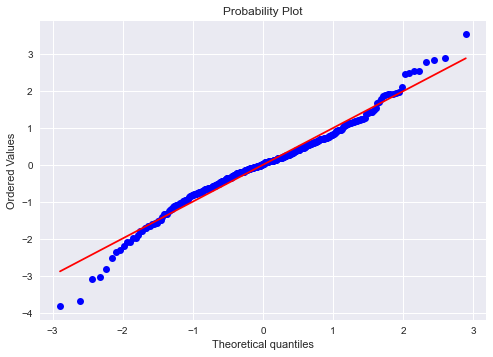

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
res_y = y_btc - np.mean(y_btc)
std_res_y = res_y/np.std(res_y)
scip.probplot(std_res_y, dist="norm", plot=plt)

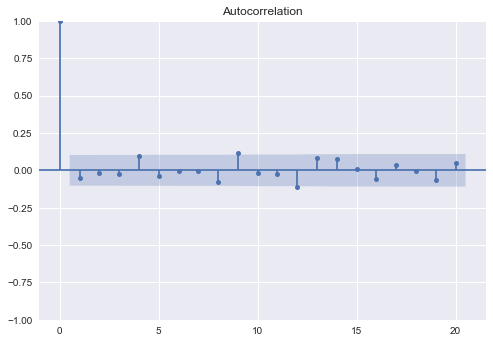

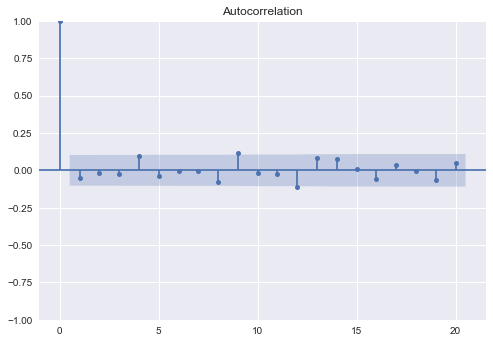

In [34]:
plot_acf(std_res_y, lags=20)

In [35]:
from arch import arch_model

GARCH = arch_model(y_btc, p=1, q=1, mean='AR', lags=1)
GARCH = GARCH.fit()
GARCH.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 132840.75354161576
Iteration:      2,   Func. Count:     19,   Neg. LLF: 348053.8720026348
Iteration:      3,   Func. Count:     27,   Neg. LLF: 962.2379998560787
Iteration:      4,   Func. Count:     38,   Neg. LLF: 6007.3345697983095
Iteration:      5,   Func. Count:     47,   Neg. LLF: -637.1763793132578
Iteration:      6,   Func. Count:     57,   Neg. LLF: -667.5589264752214
Iteration:      7,   Func. Count:     65,   Neg. LLF: -659.0956432409563
Iteration:      8,   Func. Count:     72,   Neg. LLF: -665.3594436842519
Iteration:      9,   Func. Count:     80,   Neg. LLF: -650.4594517699934
Iteration:     10,   Func. Count:     88,   Neg. LLF: -671.1491029939341
Iteration:     11,   Func. Count:     94,   Neg. LLF: -671.1491736524329
Iteration:     12,   Func. Count:    100,   Neg. LLF: -671.1491871227072
Iteration:     13,   Func. Count:    105,   Neg. LLF: -671.1491871231865
Optimization terminated successfully    (Exit mode 0)

/home/whitecerberus/.local/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001496. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Mean Model:                        AR   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                671.149
Distribution:                  Normal   AIC:                          -1332.30
Method:            Maximum Likelihood   BIC:                          -1312.81
                                        No. Observations:                  364
Date:                Thu, Mar 24 2022   Df Residuals:                      362
Time:                        19:43:09   Df Model:                            2
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const      7.0554e-05  2.012e-03  3.506e-02      0.972 [-3.874e-03,4.015e-03]
y[1]          -0.0232  4.958e-02     -0.468      0.640    [ -0.120,7.398e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      6.6999e-05  1.272e-05      5.267  1.386e-07  [4.207e-05,9.193e-05]
alpha[1]       0.0249  1.427e-02      1.742  8.148e-02 [-3.107e-03,5.282e-02]
beta[1]        0.9307  1.057e-02     88.062      0.000      [  0.910,  0.951]
=============================================================================

Covariance estimator: robust
"""

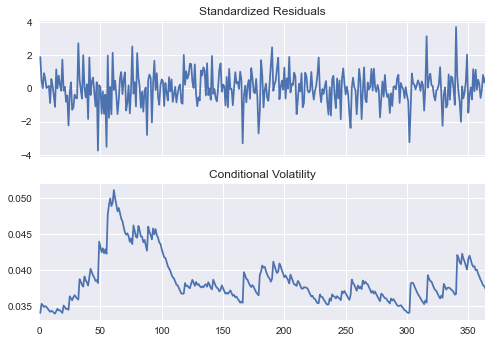

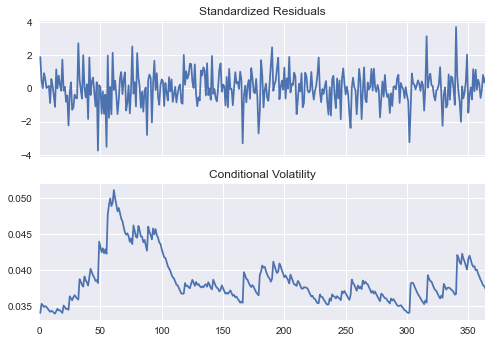

In [36]:
GARCH.plot()

((array([-2.89390132, -2.60322082, -2.43909133, -2.32236579, -2.23068127,
         -2.15462424, -2.08930527, -2.03184595, -1.98040307, -1.9337225 ,
         -1.89091076, -1.85130798, -1.81441238, -1.7798332 , -1.74725991,
         -1.71644151, -1.68717209, -1.65928058, -1.6326232 , -1.60707795,
         -1.58254034, -1.55892018, -1.53613907, -1.5141284 , -1.49282777,
         -1.4721837 , -1.45214864, -1.43268009, -1.41373991, -1.39529372,
         -1.37731045, -1.35976189, -1.34262235, -1.3258684 , -1.30947857,
         -1.29343314, -1.27771398, -1.26230434, -1.24718875, -1.23235287,
         -1.21778338, -1.20346791, -1.18939491, -1.17555361, -1.16193392,
         -1.14852643, -1.13532228, -1.12231317, -1.10949126, -1.09684921,
         -1.08438008, -1.0720773 , -1.05993468, -1.04794637, -1.0361068 ,
         -1.02441072, -1.01285312, -1.00142926, -0.99013462, -0.97896489,
         -0.96791599, -0.956984  , -0.9461652 , -0.93545603, -0.92485308,
         -0.9143531 , -0.90395298, -0.

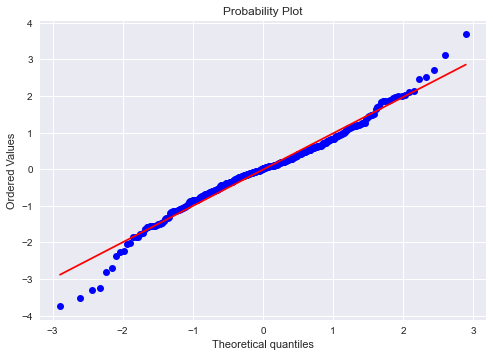

In [61]:
GARCH_std_res = GARCH.resid / GARCH.conditional_volatility
GARCH_std_res = GARCH_std_res[1:]
scip.probplot(GARCH_std_res, dist="norm", plot=plt)